# Q3.1 Linear Least Square Fitting
## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable as ptbl

## Importing Database

In [2]:
data = pd.read_csv('Salary_Data.csv')

In [3]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Extracting Dependent and independent data from database int X and y variables

In [4]:
X = data.iloc[:,0].values
y = data.iloc[:,-1].values

## Function for Linear Least Square Fitting
## y = mx + b

In [5]:
def linearfitting(x,y):
    n = len(x)
    x_sq_sum = sum(x**2)
    x_sum = sum(x)
    yx_sum = sum(x*y)
    y_sum = sum(y)

    A = np.array([
        [x_sq_sum,x_sum],
        [x_sum,n]
        ])

    b = np.array([
        [yx_sum],
        [y_sum]
        ])

    invA = np.linalg.inv(A)
    M = np.matmul(invA,b)
    
    return M

## Calling Linear Least Square fitting function on given database

In [6]:
M = linearfitting(X,y)
m = M[0][0]
b = M[1][0]

## Visualizing Calculated Coefficient and constant

In [7]:
print("m = ",m,"\tb = ",b)

m =  9449.962321455096 	b =  25792.200198668637


## Calculating Approximate Values

In [8]:
y_pred = m*X + b

## Table of actual values and predicted values

In [9]:
table = ptbl(['X','y','y-predicted'])
for i in range(len(X)):
    table.add_row([X[i],y[i],y_pred[i]])
print(table)

+------+----------+--------------------+
|  X   |    y     |    y-predicted     |
+------+----------+--------------------+
| 1.1  | 39343.0  | 36187.15875226924  |
| 1.3  | 46205.0  | 38077.15121656026  |
| 1.5  | 37731.0  | 39967.14368085128  |
| 2.0  | 43525.0  | 44692.12484157883  |
| 2.2  | 39891.0  | 46582.11730586985  |
| 2.9  | 56642.0  | 53197.090930888415 |
| 3.0  | 60150.0  | 54142.087163033924 |
| 3.2  | 54445.0  | 56032.07962732494  |
| 3.2  | 64445.0  | 56032.07962732494  |
| 3.7  | 57189.0  | 60757.06078805249  |
| 3.9  | 63218.0  | 62647.05325234351  |
| 4.0  | 55794.0  | 63592.04948448902  |
| 4.0  | 56957.0  | 63592.04948448902  |
| 4.1  | 57081.0  | 64537.04571663453  |
| 4.5  | 61111.0  | 68317.03064521657  |
| 4.9  | 67938.0  |  72097.0155737986  |
| 5.1  | 66029.0  | 73987.00803808963  |
| 5.3  | 83088.0  | 75877.00050238064  |
| 5.9  | 81363.0  |  81546.9778952537  |
| 6.0  | 93940.0  | 82491.97412739921  |
| 6.8  | 91738.0  | 90051.94398456329  |
| 7.1  | 98273.0

## Visualizing Best Fit Line

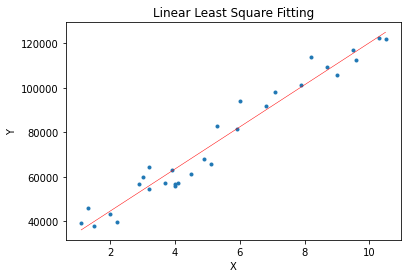

In [10]:
plt.scatter(X,y, marker = '.')
plt.plot(X,y_pred,color = 'red',linewidth = 0.5)
plt.title('Linear Least Square Fitting')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Evaluating Error in reconstruction

In [11]:
max_error = max(abs(y-y_pred)/y)
print(max_error)

0.17590842513666785
